In [43]:
import sys
import os

# Add the src/ folder to Python's import path
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)
    
from features import (
    compute_inter_iris_distance,
    compute_average_diameter,
    normalise_distance,
)
import pandas as pd
import matplotlib.pyplot as plt



In [44]:
def process_dnorm(filepath):
    df = pd.read_csv(filepath)
    norm_distances = []

    for i, row in df.iterrows():
        left_mid = (row["left_mid_x"], row["left_mid_y"])
        right_mid = (row["right_mid_x"], row["right_mid_y"])
        left_inner = (row["left_inner_x"], row["left_inner_y"])
        left_outer = (row["left_outer_x"], row["left_outer_y"])
        right_inner = (row["right_inner_x"], row["right_inner_y"])
        right_outer = (row["right_outer_x"], row["right_outer_y"])

        inter = compute_inter_iris_distance(left_mid, right_mid)
        avg_diameter = compute_average_diameter(left_inner, left_outer, right_inner, right_outer)
        norm = normalise_distance(inter, avg_diameter)

        norm_distances.append(norm)

    # Remove NaNs
    return [x for x in norm_distances if pd.notna(x)]

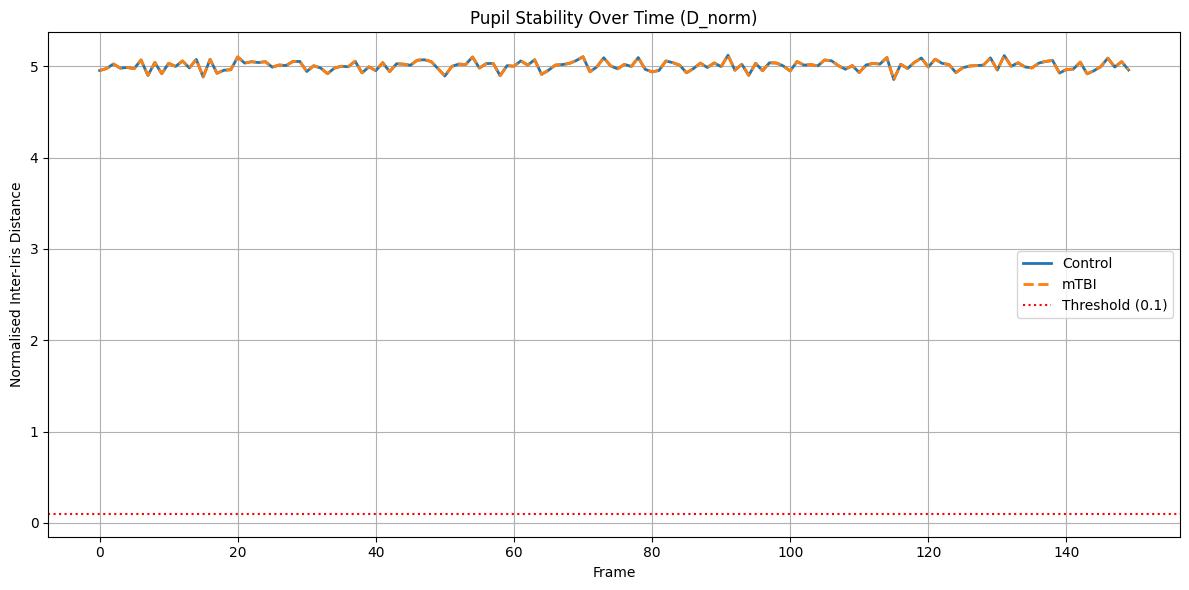

In [45]:
control = process_dnorm("/workspaces/iris-mtbi-screening/data/raw/control_sample.csv")
mtbi = process_dnorm("/workspaces/iris-mtbi-screening/data/raw/control_sample.csv")

plt.figure(figsize=(12, 6))
plt.plot(control, label="Control", linewidth=2)
plt.plot(mtbi, label="mTBI", linewidth=2, linestyle='--')
plt.axhline(y=0.1, color='r', linestyle=':', label="Threshold (0.1)")
plt.xlabel("Frame")
plt.ylabel("Normalised Inter-Iris Distance")
plt.title("Pupil Stability Over Time (D_norm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()